<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/nn/batch_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git


Cloning into 'deepLearning'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 40 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), 777.69 KiB | 2.84 MiB/s, done.


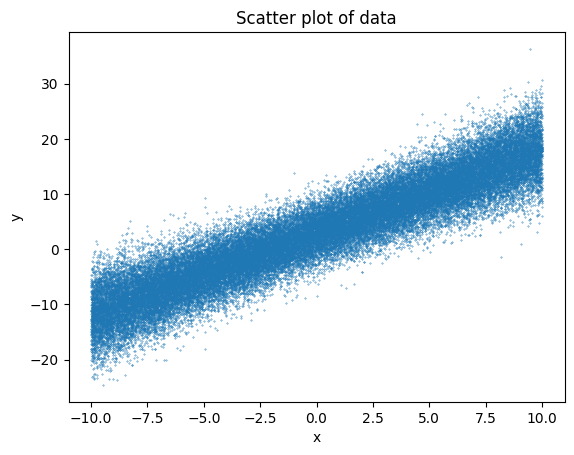

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
data = pd.read_csv('./deepLearning/nn/points50k.csv')

x = data['x']
y = data['y']

plt.scatter(x=x,y=y, s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()

In [3]:
print(len(x))

50000


In [4]:
import torch

# Convert x and y to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

data_length = len(x_tensor)
split_n = int(data_length*0.9)
train_x = x_tensor[:split_n]
train_y = y_tensor[:split_n]
val_x = x_tensor[split_n:]
val_y = y_tensor[split_n:]

g = torch.Generator().manual_seed(42)

def get_batch(x,y,batch_size=16):
    data_length = len(x)
    indices = torch.randint(0, data_length, (batch_size,), generator=g)  # Get random indices
    return x[indices], y[indices]  # Return random samples

batch_x, batch_y = get_batch(train_x,train_y)
print(batch_x)



tensor([-5.9500, -7.4400, -1.3300, -8.0500,  1.0200,  4.1000,  7.8400, -7.0100,
         3.6800, -0.3800,  2.9600,  4.2000,  9.8900,  6.7800,  5.0200, -9.3800])


In [5]:
g.manual_seed(42)
a_tensor = torch.tensor(3.0, requires_grad=True)
b_tensor = torch.tensor(0.0, requires_grad=True)
for step in range(5000):
    batch_x, batch_y = get_batch(train_x,train_y)
    diff = (a_tensor * batch_x + b_tensor- batch_y) ** 2
    loss = torch.mean(diff)

    val_loss = torch.mean((a_tensor * val_x + b_tensor - val_y)** 2)
    print(f"{step}, val loss : {val_loss}, trian loss: {loss} a value: {a_tensor.item()}, b val: {b_tensor.item()}" )

    grad = loss.backward()

    with torch.no_grad():
        a_tensor -= 0.001 * a_tensor.grad
        b_tensor -= 0.001 * b_tensor.grad

    # Reset gradients
    a_tensor.grad.zero_()
    b_tensor.grad.zero_()



0, val loss : 98.858154296875, trian loss: 97.568359375 a value: 3.0, b val: 0.0
1, val loss : 87.490478515625, trian loss: 96.36578369140625 a value: 2.885220527648926, b val: 0.0027675004675984383
2, val loss : 78.204833984375, trian loss: 90.34783935546875 a value: 2.7841453552246094, b val: 0.007261291146278381
3, val loss : 70.54683685302734, trian loss: 56.280052185058594 a value: 2.6950368881225586, b val: 0.01838408038020134
4, val loss : 64.61568450927734, trian loss: 61.42787170410156 a value: 2.6210265159606934, b val: 0.02431730180978775
5, val loss : 58.50048828125, trian loss: 62.852962493896484 a value: 2.538989782333374, b val: 0.026686592027544975
6, val loss : 53.077213287353516, trian loss: 53.48963165283203 a value: 2.4610657691955566, b val: 0.03480412811040878
7, val loss : 48.36351776123047, trian loss: 29.007415771484375 a value: 2.387890338897705, b val: 0.04163355380296707
8, val loss : 45.75135040283203, trian loss: 22.298795700073242 a value: 2.3445608615875

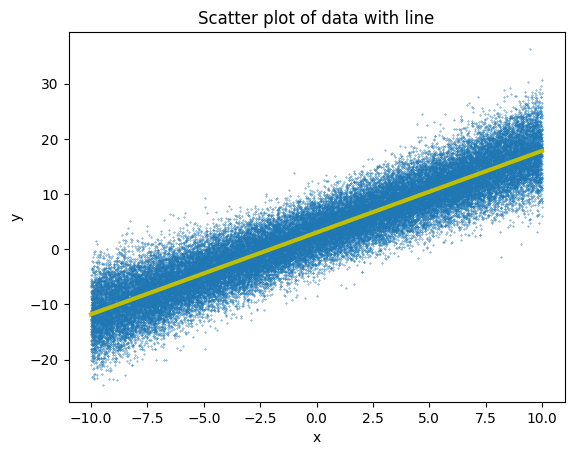

In [6]:
import numpy as np

plt.scatter(x=x, y=y, s=0.1)

# Line parameters
a = a_tensor.item()
b = b_tensor.item()

# Generate x values
x_line = np.linspace(-10, 10, 100)
y_line = a * x_line + b

# Plot line
plt.plot(x_line, y_line, color='y', lw=3)

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data with line')

plt.show()